In [2]:
## importing libraries
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
## reading data
data = pd.read_csv('./data/learningSet.csv')
data


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


In [5]:
## Checking for NULL Values

num_columns = data.select_dtypes(include="number")
num_columns.isna().sum()

ODATEDW         0
TCODE           0
DOB             0
AGE         23665
NUMCHLD     83026
            ...  
TARGET_B        0
TARGET_D        0
HPHONE_D        0
RFA_2F          0
CLUSTER2      132
Length: 407, dtype: int64

In [19]:
data.info

<bound method DataFrame.info of        ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE   DOB NOEXCH  \
0         8901     GRI      0    IL  61081                    3712      0   
1         9401     BOA      1    CA  91326                    5202      0   
2         9001     AMH      1    NC  27017                       0      0   
3         8701     BRY      0    CA  95953                    2801      0   
4         8601              0    FL  33176                    2001      0   
...        ...     ...    ...   ...    ...      ...      ...   ...    ...   
95407     9601     ASE      1    AK  99504                       0      0   
95408     9601     DCD      1    TX  77379                    5001      0   
95409     9501     MBC      1    MI  48910                    3801      0   
95410     8601     PRV      0    CA  91320                    4005      0   
95411     8801     MCC      2    NC  28409                    1801      0   

      RECINHSE  ... TARGET_D HPHONE_D RFA_2

In [8]:
## DATA CLEANING.
## Applying Distinct Cleaning methods fro the following features: GEOCODE2, WEALTH1, ADI, DMA, MSA

In [13]:
## GEOCODE2 (Categorical Data Cleaning). Filling missing values with the mode

geocode1_mode = data['GEOCODE2'].mode()[0]
data['GEOCODE2'] = data['GEOCODE2'].fillna(geocode1_mode)

data['GEOCODE2'] = data['GEOCODE2'].str.upper()

In [14]:
## WEALTH1 (Numerical Data Cleaning) Imputing missing values with the median

wealth1_median = data['WEALTH1'].median()
data['WEALTH1'] = data['WEALTH1'].fillna(wealth1_median)

## also handling with outliers
q_low = data['WEALTH1'].quantile(0.01)
q_high = data['WEALTH1'].quantile(0.99)
data['WEALTH1'] = data['WEALTH1'].clip(lower=q_low, upper=q_high)

In [15]:
## ADI (Numerical Data Cleaning) Imputing missing values with the median

adi_median = data['ADI'].median()
data['ADI'] = data['ADI'].fillna(adi_median)

In [20]:
## DMA (Categorical Data Cleaning) Fill missing values with 'Unknown'

data['DMA'] = data['DMA'].fillna('Unknown')

In [22]:
## MSA (Categorical Data Cleaning) Imputing missing values with median

msa_median = data['MSA'].median()
filled_data = data.fillna({'MSA': msa_median})

In [33]:
# Addressing the warning : "mixed types in column 8 (NOEXCH)""
data['NOEXCH'] = pd.to_numeric(data['NOEXCH'], errors='coerce')

## Exploratory Data Analysis (EDA)
-----------
- Statistics

--------

In [34]:
data.describe()

,ODATEDW,TCODE,DOB,NOEXCH,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,...,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,RFA_2A,CLUSTER2
count,95412.000000,95412.000000,95412.000000,95370.000000,71747.000000,12386.000000,74126.000000,95412.000000,95412.000000,42558.000000,...,85439.000000,85439.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,0.0,95280.000000
mean,9141.363256,54.223117,2723.602933,0.002988,61.611649,1.527773,3.886248,5.652455,3.321438,0.152075,...,9151.022917,8.093739,13.347786,95778.176959,0.050759,0.793073,0.500618,1.910053,NaN,31.533711
std,343.454752,953.844476,2132.241295,0.054584,16.664199,0.806861,1.854960,2.025250,9.306899,0.470023,...,294.257260,8.213242,10.769997,55284.596094,0.219506,4.429725,0.500002,1.072749,NaN,18.764614
min,8306.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,7211.000000,0.000000,1.285714,1.000000,0.000000,0.000000,0.000000,1.000000,NaN,1.000000
25%,8801.000000,0.000000,201.000000,0.000000,48.000000,1.000000,2.000000,5.000000,0.000000,0.000000,...,8903.000000,4.000000,8.384615,47910.750000,0.000000,0.000000,0.000000,1.000000,NaN,15.000000
50%,9201.000000,1.000000,2610.000000,0.000000,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,...,9204.000000,6.000000,11.636364,95681.500000,0.000000,0.000000,1.000000,2.000000,NaN,32.000000
75%,9501.000000,2.000000,4601.000000,0.000000,75.000000,2.000000,5.000000,6.000000,3.000000,0.000000,...,9409.000000,11.000000,15.477955,143643.500000,0.000000,0.000000,1.000000,3.000000,NaN,49.000000
max,9701.000000,72002.000000,9710.000000,1.000000,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,...,9702.000000,1088.000000,1000.000000,191779.000000,1.000000,200.000000,1.000000,4.000000,NaN,62.000000


In [35]:
# Descriptive statistics only for relevant features
data[['TARGET_D', 'DOB', 'STATE', 'ZIP', 'RFA_2F', 'RFA_2A']].describe(include='all')

,TARGET_D,DOB,STATE,ZIP,RFA_2F,RFA_2A
count,95412.000000,95412.000000,95412,95412,95412.000000,0.0
unique,NaN,NaN,57,19938,NaN,NaN
top,NaN,NaN,CA,85351,NaN,NaN
freq,NaN,NaN,17343,61,NaN,NaN
mean,0.793073,2723.602933,NaN,NaN,1.910053,NaN
std,4.429725,2132.241295,NaN,NaN,1.072749,NaN
min,0.000000,0.000000,NaN,NaN,1.000000,NaN
25%,0.000000,201.000000,NaN,NaN,1.000000,NaN
50%,0.000000,2610.000000,NaN,NaN,2.000000,NaN
75%,0.000000,4601.000000,NaN,NaN,3.000000,NaN


--------
- Plotting Features
--------

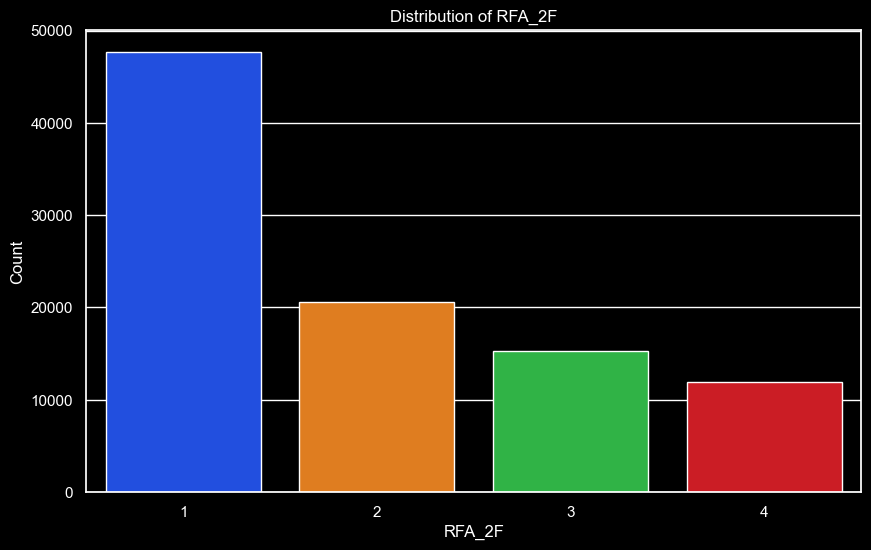

In [36]:
# Counting plots for RFA_2F and RFA_2A
plt.figure(figsize=(10, 6))
sns.countplot(x='RFA_2F', data=data, palette='bright')
plt.title('Distribution of RFA_2F')
plt.xlabel('RFA_2F')
plt.ylabel('Count')
plt.show()

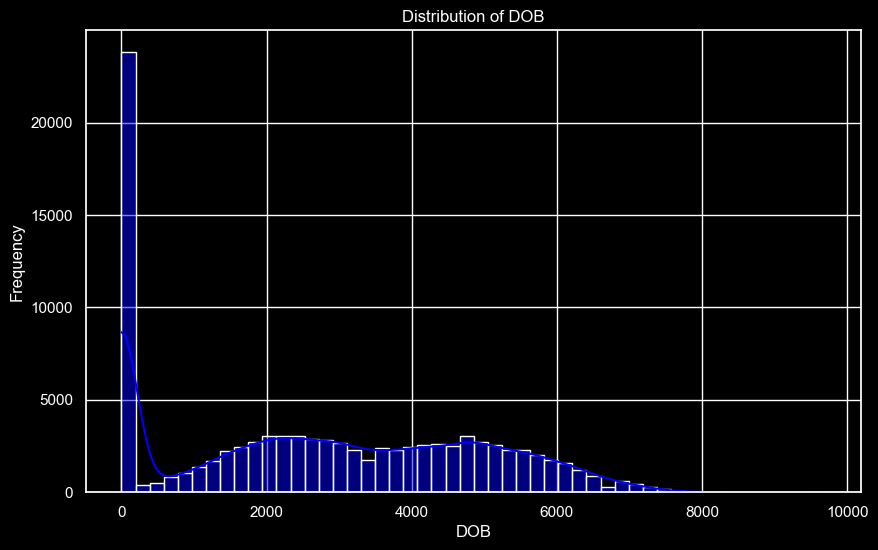

In [37]:


plt.figure(figsize=(10, 6))
sns.histplot(data['DOB'], bins=50, kde=True, color='blue')
plt.title('Distribution of DOB')
plt.xlabel('DOB')
plt.ylabel('Frequency')
plt.show()

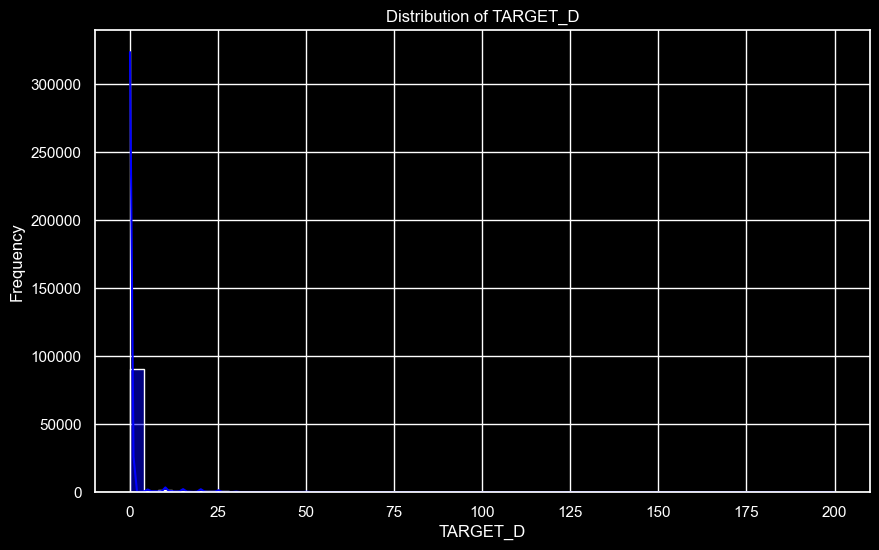

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data['TARGET_D'], bins=50, kde=True, color='blue')
plt.title('Distribution of TARGET_D')
plt.xlabel('TARGET_D')
plt.ylabel('Frequency')
plt.show()

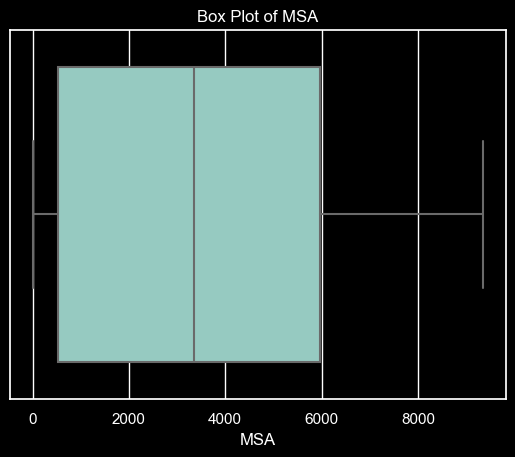

In [39]:
sns.boxplot(x=data['MSA'])
plt.title('Box Plot of MSA')
plt.show()

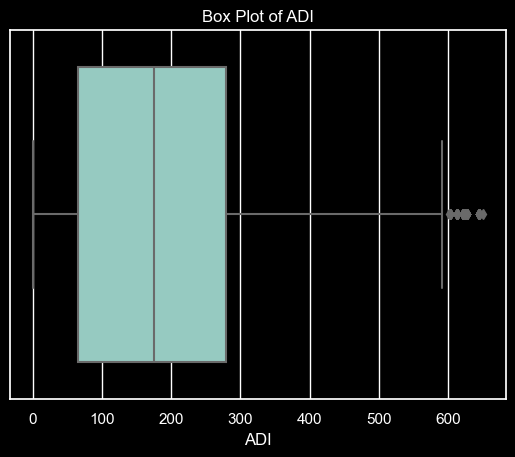

In [40]:
sns.boxplot(x=data['ADI'])
plt.title('Box Plot of ADI')
plt.show()

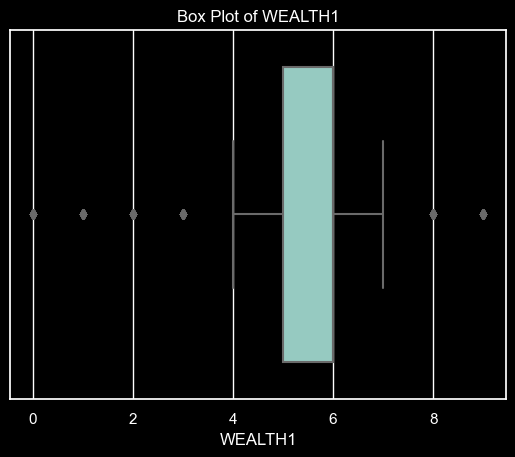

In [41]:
sns.boxplot(x=data['WEALTH1'])
plt.title('Box Plot of WEALTH1')
plt.show()

---
- Heatmap for correlations
----

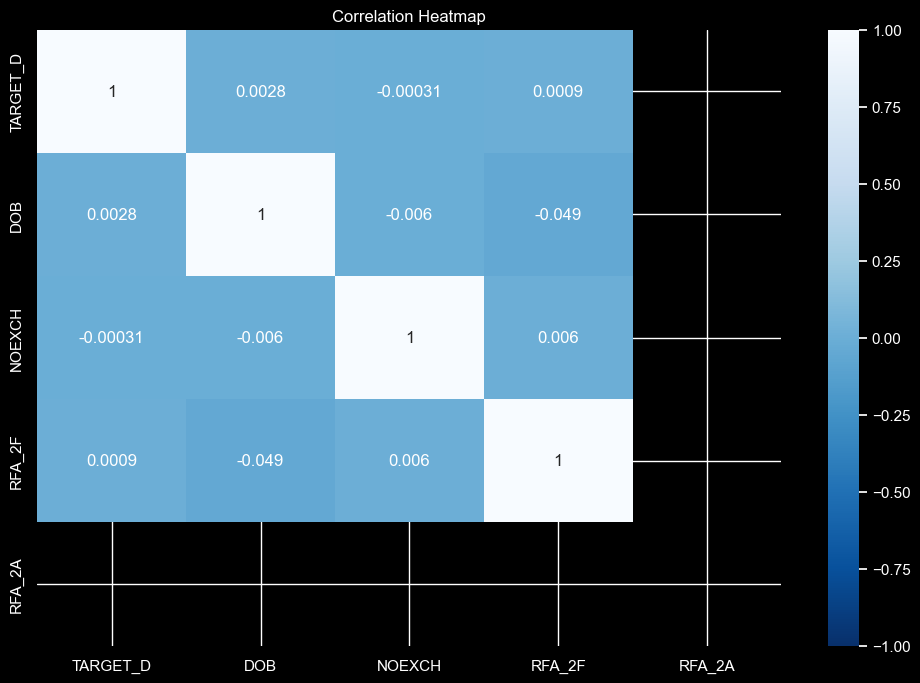

In [42]:
data['RFA_2F'] = pd.to_numeric(data['RFA_2F'], errors='coerce')
data['RFA_2A'] = pd.to_numeric(data['RFA_2A'], errors='coerce')

correlation_matrix = data[['TARGET_D', 'DOB', 'NOEXCH', 'RFA_2F', 'RFA_2A']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues_r', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()